In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Wallace.csv')
df

,user_country,source,content,date
0,"New Jersey, USA",Twitter for iPhone,Chris Wallace says he wants to be ‘invisible’ ...,2020-09-29T23:59:58+00:00
1,NaN,Twitter for iPhone,"@mckaycoppins ___ ""At the debate Tuesday Biden...",2020-09-29T23:59:58+00:00
2,"New Jersey, USA",Twitter for Android,@Dutchy_Henky @franklincflint @JTStone9 @Maure...,2020-09-29T23:59:58+00:00
3,NEPA,Twitter Web App,Yeah! Chris Wallace?!? How did that happen?? h...,2020-09-29T23:59:57+00:00
4,"Los Angeles, CA",palmerreport-billpalmer,What to really expect from Chris Wallace in to...,2020-09-29T23:59:56+00:00
...,...,...,...,...
1995,Staring into the Abyss,Twitter Web App,"""Good Evening. I'm Christopher Wallace the Nec...",2020-09-29T22:58:41+00:00
1996,Murphys California,Twitter Web App,SHAME OF THE FOX NEWS PEOPLE....COVERING UP AN...,2020-09-29T22:58:40+00:00
1997,Somewhere in the middle,Twitter for iPhone,"I’m sure I’m not the first one to say it, but ...",2020-09-29T22:58:35+00:00
1998,NaN,Twitter Web App,@thor_benson @LoverOfBooks123 If he manages to...,2020-09-29T22:58:34+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

52531
['chris', 'wallace', 'says', 'he', 'wants', 'to', 'be', '‘', 'invisible', '’', 'as', 'debate', 'moderator', '.', 'will', 'trump', 'let', 'him', '?', 'https://t.co/ceeyy8aue5@mckaycoppins']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 145.65%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

23141
['chris', 'wallace', 'says', 'wants', 'invisible', 'debate', 'moderator', 'trump', 'let', 'debate', 'tuesday', 'biden', 'start', 'every', 'response', 'looking', 'chris', 'wallace', 'say', 'well']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@joebiden', 112),
 ('@realdonaldtrump', 96),
 ('@foxnews', 73),
 ('@foxnewssunday', 55),
 ('@kenny_wallace', 27),
 ('@msnbc', 26),
 ('@nascar', 25),
 ('@dearauntcrabby', 24),
 ('@lisamarieboothe', 23),
 ('@megynkelly', 22),
 ('@cnn', 22),
 ('@kxel1540', 20),
 ('@potus', 19),
 ('@donnabrazile', 19),
 ('@ingrahamangle', 19),
 ('@bretbaier', 18),
 ('@truth', 18),
 ('@seanhannity', 16),
 ('@toddstarnes', 16),
 ('@abc', 15)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"New Jersey, USA",Twitter for iPhone,Chris Wallace says he wants to be ‘invisible’ ...,2020-09-29T23:59:58+00:00,Positive
1,NaN,Twitter for iPhone,"@mckaycoppins ___ ""At the debate Tuesday Biden...",2020-09-29T23:59:58+00:00,Neutral
2,"New Jersey, USA",Twitter for Android,@Dutchy_Henky @franklincflint @JTStone9 @Maure...,2020-09-29T23:59:58+00:00,Neutral
3,NEPA,Twitter Web App,Yeah! Chris Wallace?!? How did that happen?? h...,2020-09-29T23:59:57+00:00,Neutral
4,"Los Angeles, CA",palmerreport-billpalmer,What to really expect from Chris Wallace in to...,2020-09-29T23:59:56+00:00,Positive
...,...,...,...,...,...
1995,Staring into the Abyss,Twitter Web App,"""Good Evening. I'm Christopher Wallace the Nec...",2020-09-29T22:58:41+00:00,Positive
1996,Murphys California,Twitter Web App,SHAME OF THE FOX NEWS PEOPLE....COVERING UP AN...,2020-09-29T22:58:40+00:00,Positive
1997,Somewhere in the middle,Twitter for iPhone,"I’m sure I’m not the first one to say it, but ...",2020-09-29T22:58:35+00:00,Positive
1998,NaN,Twitter Web App,@thor_benson @LoverOfBooks123 If he manages to...,2020-09-29T22:58:34+00:00,Negative


In [11]:
df.sentiment.value_counts()

Neutral     855
Positive    779
Negative    366
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 38.95%
Percentage of neutral tweets: 42.75%
Percentage of negative tweets: 18.30%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

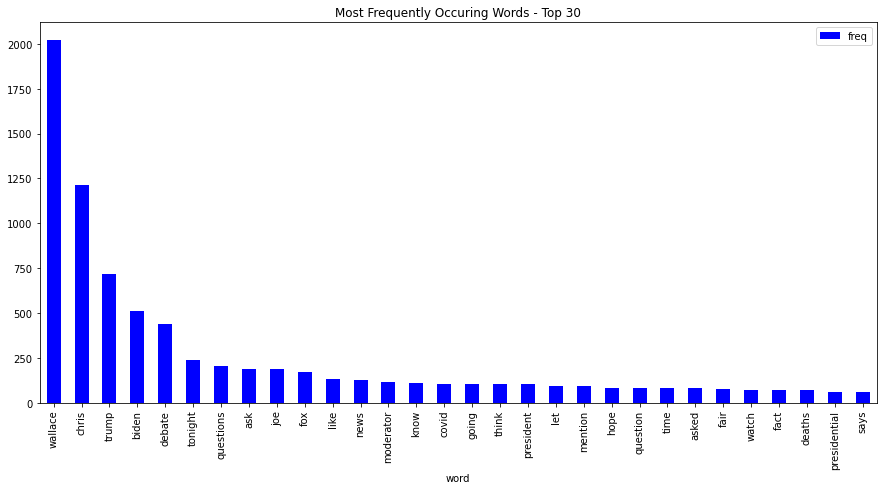

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

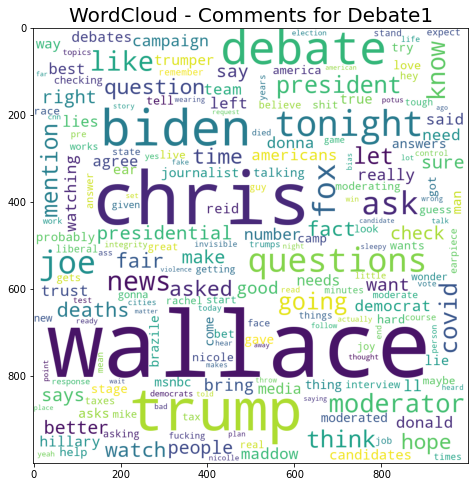

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

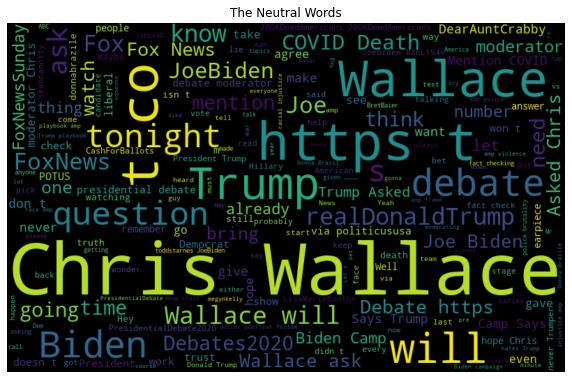

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

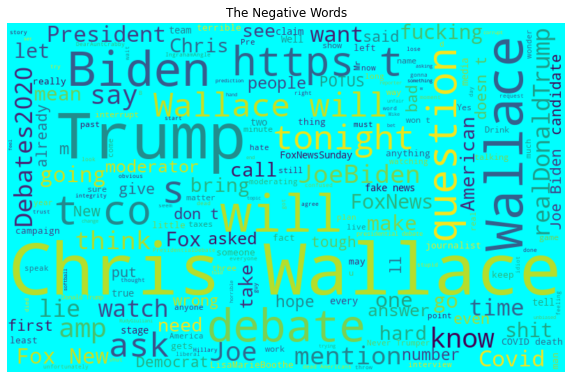

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

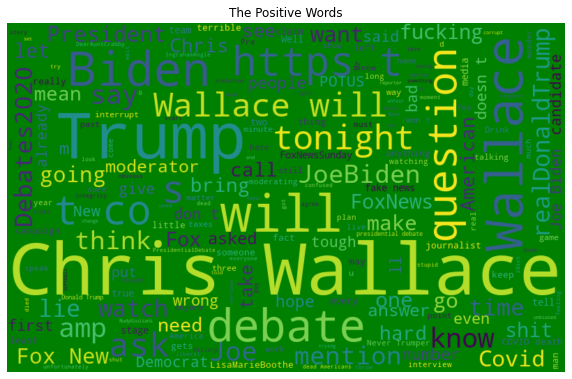

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,Chris Wallace says he wants to be ‘invisible’ ...,Positive
1,"@mckaycoppins ___ ""At the debate Tuesday Biden...",Neutral
2,@Dutchy_Henky @franklincflint @JTStone9 @Maure...,Neutral
3,Yeah! Chris Wallace?!? How did that happen?? h...,Neutral
4,What to really expect from Chris Wallace in to...,Positive
...,...,...
1995,"""Good Evening. I'm Christopher Wallace the Nec...",Positive
1996,SHAME OF THE FOX NEWS PEOPLE....COVERING UP AN...,Positive
1997,"I’m sure I’m not the first one to say it, but ...",Positive
1998,@thor_benson @LoverOfBooks123 If he manages to...,Negative


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,chris wallace says he wants to be invisible as...
1,Neutral,at the debate tuesday biden should start every...
2,Neutral,henky and is on wallace s debate prep team
3,Neutral,yeah chris wallace how did that happen
4,Positive,what to really expect from chris wallace in to...
...,...,...
1995,Positive,good evening i m christopher wallace the necro...
1996,Positive,shame of the fox news people covering up and m...
1997,Positive,i m sure i m not the first one to say it but d...
1998,Negative,benson if he manages to not throw actual shit ...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,chris wallace says he wants to be invisible as...
4,Positive,what to really expect from chris wallace in to...
5,Positive,why won t chris wallace ask about my other unp...
6,Positive,you can watch abc listen to chris christie pro...
8,Positive,chris wallace moderator of the debate is also ...
...,...,...
1979,Negative,over under for debatetuesday people who will w...
1989,Negative,it is a lie and that idiot knows it on the oth...
1992,Negative,christie stop spreading lies dodo that s compl...
1998,Negative,benson if he manages to not throw actual shit ...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,chris wallace says he wants to be invisible as...
4,1,what to really expect from chris wallace in to...
5,1,why won t chris wallace ask about my other unp...
6,1,you can watch abc listen to chris christie pro...
8,1,chris wallace moderator of the debate is also ...
...,...,...
1979,0,over under for debatetuesday people who will w...
1989,0,it is a lie and that idiot knows it on the oth...
1992,0,christie stop spreading lies dodo that s compl...
1998,0,benson if he manages to not throw actual shit ...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(858, 2)
(287, 2)


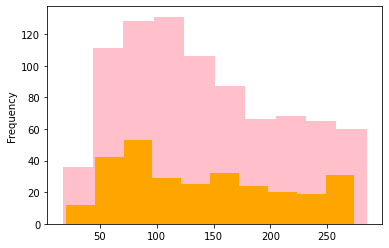

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(276245, 455160)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('tuesday', 0.8356555700302124),
 ('constantly', 0.8070163726806641),
 ('lie', 0.8021254539489746),
 ('barr', 0.801164448261261),
 ('attacks', 0.7994145154953003),
 ('vice', 0.7954340577125549),
 ('demand', 0.7941488027572632),
 ('biden', 0.792182445526123),
 ('repeats', 0.7915508151054382),
 ('jeremy', 0.789411187171936)]

In [37]:
model_w2v.wv.most_similar(negative = "trump")

[('time', -0.45296579599380493),
 ('live', -0.4564281702041626),
 ('should', -0.46480005979537964),
 ('down', -0.4650867283344269),
 ('news', -0.4792718291282654),
 ('an', -0.487476110458374),
 ('never', -0.4896349608898163),
 ('moderated', -0.49087709188461304),
 ('invisible', -0.5021141767501831),
 ('trumper', -0.5038893222808838)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(858, 500)
(858,)
(287, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5644599303135889
F1 score : 0.6736292428198435
[[ 33  44]
 [ 81 129]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9988344988344988
Validation Accuracy : 0.5818815331010453
f1 score : 0.7058823529411764
[[ 23  54]
 [ 66 144]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.6202090592334495
f1 score : 0.7308641975308641
[[ 30  47]
 [ 62 148]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9242424242424242
Validation Accuracy : 0.7282229965156795
f1 score : 0.8427419354838709
[[  0  77]
 [  1 209]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 elle fiore wants a prince on a white horse maverick wallace does not fit the description if only she can convince her heart he s not for her beautifully flawed by laura pavlov wrpbks romanticcomedy 

First sample after preprocessing: 
 [162   9  23   9   1  93  22   2  25 106 211  40 257  10  12  22  21 257
  49   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6574 - accuracy: 0.6593 - val_loss: 0.6153 - val_accuracy: 0.6977
Epoch 2/20
7/7 - 1s - loss: 0.6490 - accuracy: 0.6593 - val_loss: 0.6182 - val_accuracy: 0.6977
Epoch 3/20
7/7 - 1s - loss: 0.6415 - accuracy: 0.6593 - val_loss: 0.6272 - val_accuracy: 0.6977
Epoch 4/20
7/7 - 1s - loss: 0.6375 - accuracy: 0.6593 - val_loss: 0.6292 - val_accuracy: 0.6977
Epoch 5/20
7/7 - 1s - loss: 0.6332 - accuracy: 0.6593 - val_loss: 0.6220 - val_accuracy: 0.6977
Epoch 6/20
7/7 - 1s - loss: 0.6279 - accuracy: 0.6593 - val_loss: 0.6112 - val_accuracy: 0.6977
Epoch 7/20
7/7 - 1s - loss: 0.6177 - accuracy: 0.6593 - val_loss: 0.6068 - val_accuracy: 0.6977
Epoch 8/20
7/7 - 1s - loss: 0.6027 - accuracy: 0.6593 - val_loss: 0.5998 - val_accuracy: 0.6977
Epoch 9/20
7/7 - 1s - loss: 0.5754 - accuracy: 0.6593 - val_loss: 0.5947 - val_accuracy: 0.6977
Epoch 10/20
7/7 - 1s - loss: 0.5436 - accuracy: 0.6593 - val_loss: 0.5894 - val_accuracy: 0.6977
Epoch 11/20
7/7 - 1s - loss: 0.4954 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,chris wallace says he wants to be invisible as...
1,-1,at the debate tuesday biden should start every...
2,-1,henky and is on wallace s debate prep team
3,-1,yeah chris wallace how did that happen
4,1,what to really expect from chris wallace in to...
...,...,...
1995,1,good evening i m christopher wallace the necro...
1996,1,shame of the fox news people covering up and m...
1997,1,i m sure i m not the first one to say it but d...
1998,0,benson if he manages to not throw actual shit ...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.518
F1 score : [0.62601626 0.125      0.49494949]
[[154   5  68]
 [ 36   7  46]
 [ 75  11  98]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9193333333333333
Validation Accuracy : 0.47
f1 score : [0.57076566 0.11347518 0.48598131]
[[123  21  83]
 [ 24   8  57]
 [ 57  23 104]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.448
f1 score : [0.56289979 0.09459459 0.44386423]
[[132  22  73]
 [ 41   7  41]
 [ 69  30  85]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8793333333333333
Validation Accuracy : 0.546
f1 score : [0.6557377  0.         0.53427896]
[[160   0  67]
 [ 30   0  59]
 [ 71   0 113]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['i m not expecting chris wallace to be unbiased during the debate', 'deserves your active follow during the debate tonight get real time fact checking that wallace won t provide don t let trump get away with his usual toxic brew of lies projection bullying manwomanpersonvotebiden', 'chris wallace is an a hat', 'breaking kamala harris will be on after the debate with rachel maddow nicolle wallace and joy reid', 'russian now do a dana rivera a picture of chris wallace would suffice', 'overholt now i am imagining a scene where biden takes a swing at trump and then their secret service details get into massive movie martial arts fight in the studio on live tv then chris wallace shames everybody into calm and they just move on with the debate like nothing happened', 'just know chris wallace has a high opinion of himself he is part of the fake news he will try to control trump while he gives china biden a free ride mark my words', 'edna chris wallace', '

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.3792 - accuracy: 0.1852 - val_loss: 0.0920 - val_accuracy: 0.1800
Epoch 2/20
11/11 - 2s - loss: -1.1220e-01 - accuracy: 0.1852 - val_loss: -1.8658e-01 - val_accuracy: 0.1800
Epoch 3/20
11/11 - 2s - loss: -1.8800e-01 - accuracy: 0.1852 - val_loss: -3.8405e-01 - val_accuracy: 0.1800
Epoch 4/20
11/11 - 2s - loss: -2.6787e-01 - accuracy: 0.1852 - val_loss: -5.2170e-01 - val_accuracy: 0.1800
Epoch 5/20
11/11 - 2s - loss: -4.7241e-01 - accuracy: 0.1852 - val_loss: -7.0964e-01 - val_accuracy: 0.1800
Epoch 6/20
11/11 - 2s - loss: -6.7833e-01 - accuracy: 0.1852 - val_loss: -1.0842e+00 - val_accuracy: 0.1800
Epoch 7/20
11/11 - 2s - loss: -1.1279e+00 - accuracy: 0.1852 - val_loss: -1.7356e+00 - val_accuracy: 0.1800
Epoch 8/20
11/11 - 2s - loss: -2.0768e+00 - accuracy: 0.1852 - val_loss: -3.0651e+00 - val_accuracy: 0.1800
Epoch 9/20
11/11 - 2s - loss: -4.1541e+00 - accuracy: 0.1852 - val_loss: -5.9935e+00 - val_accuracy: 0.1800
Epoch 10/20
11/11 - 2s - loss: -9.1189